<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/Apart_KNeighborsRegressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./seoul_4.csv')

In [3]:
# df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114142 entries, 0 to 114141
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   gu_l          114142 non-null  int64  
 1   dong_l        114142 non-null  int64  
 2   s_c           114142 non-null  int64  
 3   used_y        114142 non-null  int64  
 4   square        114142 non-null  float64
 5   per_cost_man  114142 non-null  float64
 6   floor         114142 non-null  int64  
 7   YN_r          114142 non-null  int64  
 8   YN_top10      114142 non-null  int64  
 9   cost          114142 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 8.7 MB


In [5]:
# df.columns

In [6]:
X = df.drop(['cost','square','per_cost_man'], axis = 1)
y = df['cost']

Norm = MinMaxScaler()
X_Norm = Norm.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_Norm, y, test_size = 0.3, random_state = 0)

-0.22310401262362906


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


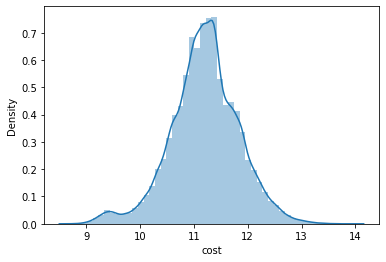

In [8]:
# 최솟값 확인
y_train.describe()
# 로그 변환
df_log = np.log(y_train)
# skewness 확인
print(df_log.skew())
# KDE plot 출력
sns.distplot(df_log);

-0.33861652613335447


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


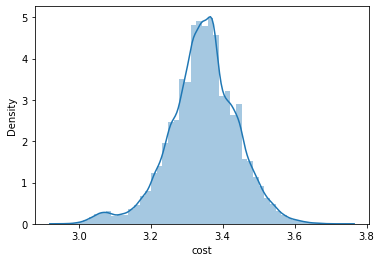

In [21]:
# 루트 변환
df_root = np.sqrt(y_train)
# skewness 확인
print(df_root.skew())
# KDE plot 출력
sns.distplot(df_root)

0.023394281224848275


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


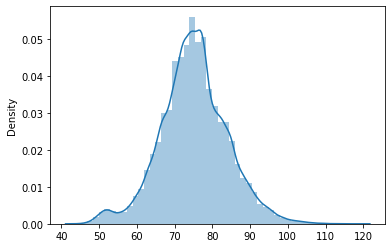

In [23]:
from scipy import stats
# box-cox 변환
df_boxcox = pd.Series(stats.boxcox(y_train)[0])
# skewness 확인
print(df_boxcox.skew())
# KDE plot 출력
sns.distplot(df_boxcox);

In [9]:
y_train = np.log(y_train)

In [10]:
y_test = np.log(y_test)

In [11]:
def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  print('{} 로그 변환된 rmse: {}'.format(model.__class__.__name__,np.round(rmse,3)))

def get_rmses(models) : 
  rmses = []
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses


In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 rmse: 0.615
Ridge 로그 변환된 rmse: 0.615
Lasso 로그 변환된 rmse: 0.635


[None, None, None]

In [13]:
def get_top_bottom_coef(model):
  coef = pd.Series(model.coef_, index=X.columns)

  coef_high = coef.sort_values(ascending=False).head(10)
  coef_low = coef.sort_values(ascending=False).tail(10)
  return coef_high, coef_low

In [14]:
def visualize_coef(models):
  fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
  fig.tight_layout()
  for i_num, model in enumerate(models):
    coef_high, coef_low = get_top_bottom_coef(model)
    coef_concat = pd.concat( [coef_high, coef_low] )

    axs[i_num].set_title(model.__class__.__name__+'Coefficients', size=25)
    axs[i_num].tick_params(axis='y', direction="in", pad=-120)
    for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
      label.set_fontsize(22)

    sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num]) 

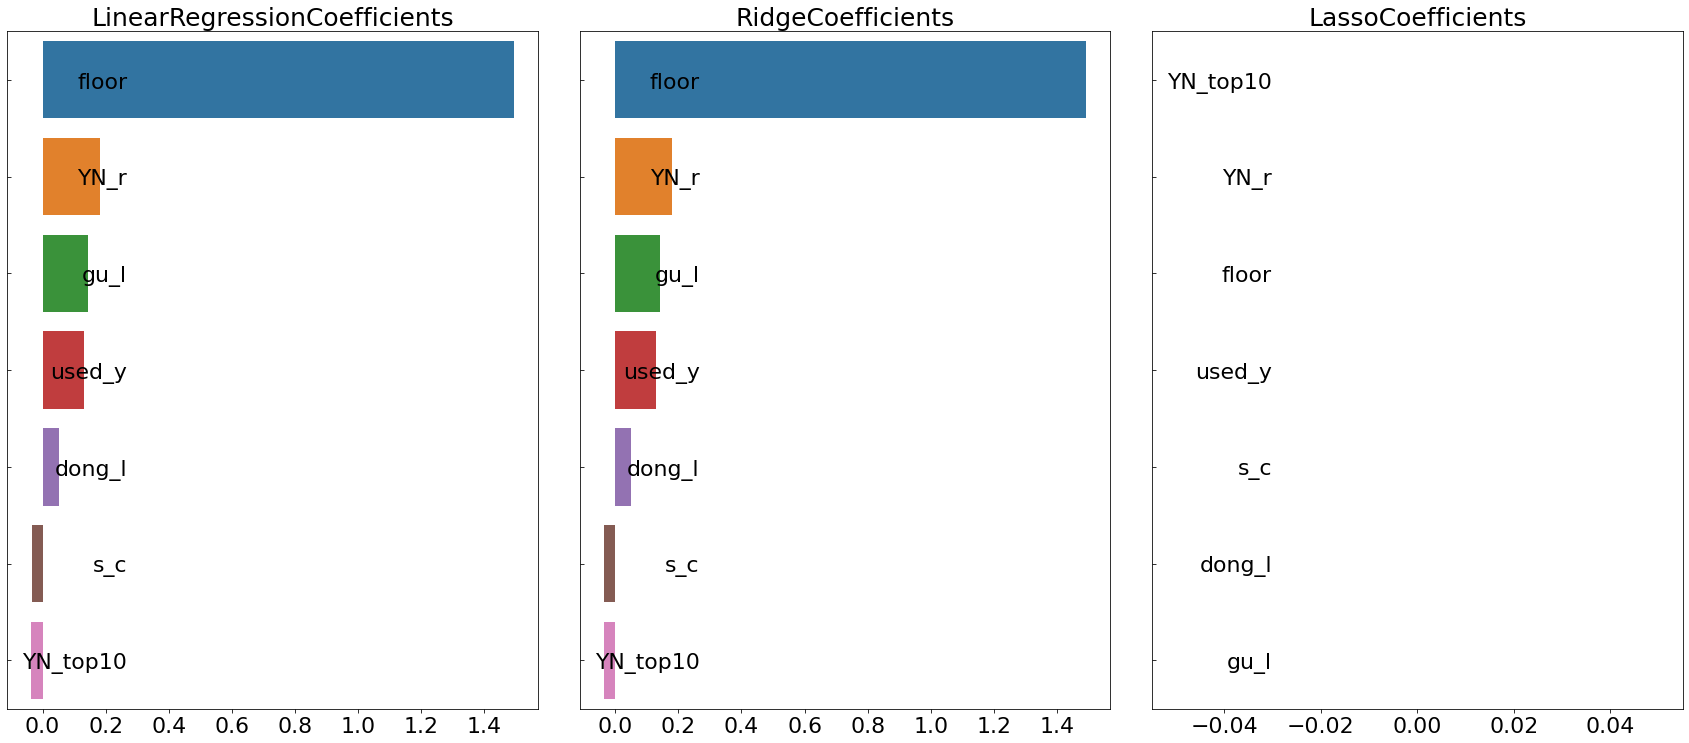

In [15]:
visualize_coef(models)

In [16]:
re = KNeighborsRegressor(n_neighbors = 24, weights = "distance") # 구가 24개

In [17]:
re.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                    weights='distance')

R-squre = 0.7708003065997803
mse = 0.09229714370382705
RMSE = 0.30380444977621224


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


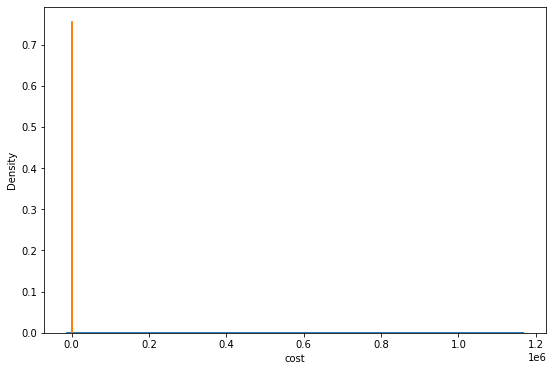

In [18]:
# 결정 계수
print(f'R-squre = {re.score(X_test, y_test)}')

pred = re.predict(X_test)

from math import sqrt
# MSE 확인
print(f'mse = {mean_squared_error(y_test, pred)}')
# RMSE
print(f'RMSE = {sqrt(mean_squared_error(y_test, pred))}')

y_X = re.predict(X_Norm)

plt.figure(figsize = (9,6))
ax1=sns.distplot(y, hist = False, label='y')
ax2=sns.distplot(y_X, hist=False, label='y_X', ax=ax1)
plt.show()

In [ ]:
# 결정계수는 높게 나오지만 오차가 1억.. 너무 크다
# y값을 정규화해서 해봄 =====================실패 y값 정규화하면 이상해짐

Norm_1 = MinMaxScaler()
df_Norm = Norm.fit_transform(df)

In [ ]:
df_1 = pd.DataFrame(df_Norm)

In [ ]:
df_1.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.02454,0.533333,0.216654,0.334067,0.100000,1.0,1.0,0.125437
1,0.0,0.02454,0.550000,0.142213,0.464748,0.100000,1.0,1.0,0.120629
2,0.0,0.02454,0.550000,0.223911,0.355145,0.100000,1.0,1.0,0.137019
3,0.0,0.02454,0.550000,0.223911,0.348691,0.114286,1.0,1.0,0.134615
4,0.0,0.02454,0.550000,0.223911,0.325222,0.071429,1.0,1.0,0.125874


In [ ]:
df_1.describe()

,0,1,2,3,4,5,6,7,8
count,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000
mean,0.454034,0.464814,0.325694,0.209294,0.192472,0.171861,0.374656,0.294826,0.072307
std,0.281896,0.278980,0.164603,0.100030,0.107717,0.087510,0.484036,0.455966,0.053921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.248466,0.216667,0.156663,0.118693,0.100000,0.000000,0.000000,0.038462
50%,0.416667,0.441718,0.316667,0.212600,0.166944,0.157143,0.000000,0.000000,0.059441
75%,0.708333,0.720859,0.433333,0.240225,0.237518,0.228571,1.000000,1.000000,0.090035
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_1.columns = ['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'floor', 'YN_r',
       'YN_top10', 'cost']

In [ ]:
df_1.head()

,gu_l,dong_l,used_y,square,per_cost_man,floor,YN_r,YN_top10,cost
0,0.0,0.02454,0.533333,0.216654,0.334067,0.100000,1.0,1.0,0.125437
1,0.0,0.02454,0.550000,0.142213,0.464748,0.100000,1.0,1.0,0.120629
2,0.0,0.02454,0.550000,0.223911,0.355145,0.100000,1.0,1.0,0.137019
3,0.0,0.02454,0.550000,0.223911,0.348691,0.114286,1.0,1.0,0.134615
4,0.0,0.02454,0.550000,0.223911,0.325222,0.071429,1.0,1.0,0.125874


In [ ]:
X_1 = df_1.drop('cost', axis = 1)
y_1 = df_1['cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.3, random_state = 0)

re_Norm = KNeighborsRegressor(n_neighbors = 24, weights = "distance")
re_Norm.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=24, weights='distance')

R-squre = 0.9636132169758931
mse = 0.00010421512443796086
RMSE = 0.010208580921850053


/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


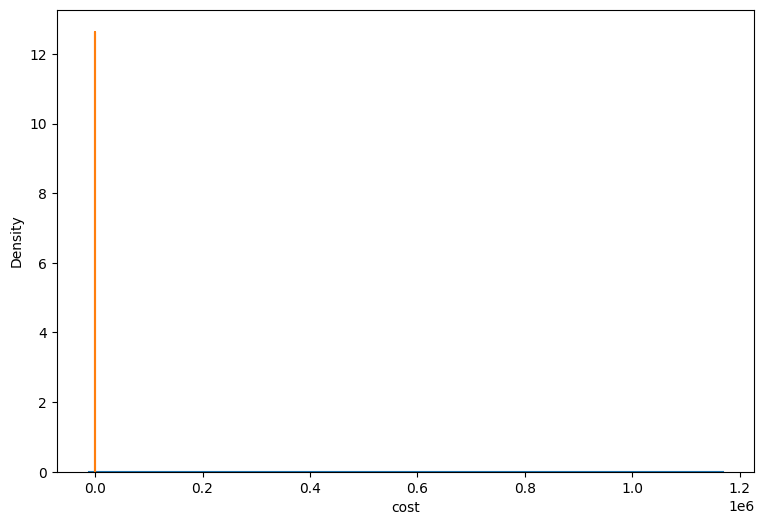

In [ ]:
# 결정 계수
print(f'R-squre = {re_Norm.score(X_test, y_test)}')

pred = re.predict(X_test)

from math import sqrt
# MSE 확인
print(f'mse = {mean_squared_error(y_test, pred)}')
# RMSE
print(f'RMSE = {sqrt(mean_squared_error(y_test, pred))}')

y_X = re.predict(X_1)

plt.figure(figsize = (9,6))
ax1=sns.distplot(y, hist = False, label='y')
ax2=sns.distplot(y_X, hist=False, label='y_X', ax=ax1)
plt.show()